<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></div>

In [4]:
## Load libraries and env settings 
%run "../../zUtilz/load_envz.ipynb"
## TODO: refactor 
%run "../../zUtilz/LG_load_envz.ipynb"

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


ERROR:root:Cell magic `%%R` not found.


In [6]:
## Load dataset
db = pd.read_csv( "%s/KNBS_et_al/national-registered-medical-personnel-2000-to-2013.csv" % DATA_DIR) 

## Clean
db.rename(index=str, columns={"2013*":"2013"}, inplace=True)
db.drop(10, inplace=True)


In [17]:
# wrangle 
db = pd.DataFrame( pd.melt(db, 
                           id_vars="Type of Personnel Over the Years", 
                           value_vars=["{:02d}".format(x) for x in range(2000, 2014)],
                          value_name="Nmb.Staff", var_name="Year") )
#help(pd.melt)
db.head()

,Type of Personnel Over the Years,Year,Nmb.Staff
0,PharmTechnologist,2000,1232
1,Registered Nurses,2000,9211
2,Pharmacists,2000,1682
3,Enrolled Nurses,2000,27902
4,Clinical officers,2000,4492


In [8]:
## Compute


# Introduction

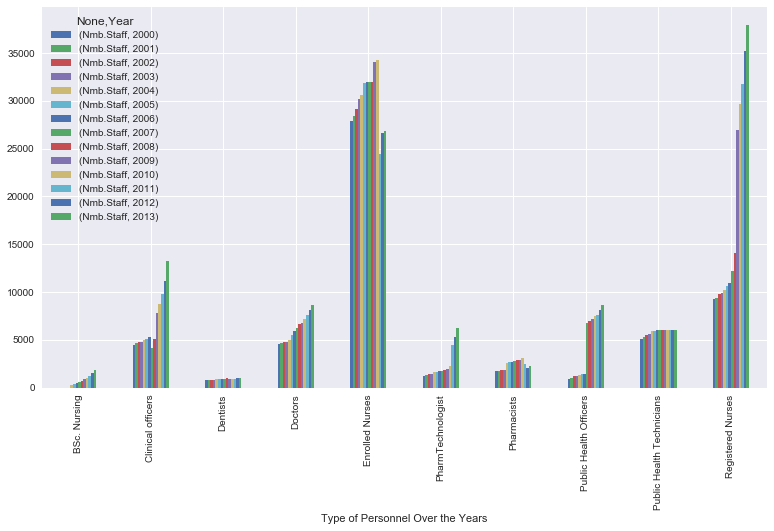

In [34]:
pd.pivot_table( db, index=["Type of Personnel Over the Years"], columns=["Year"], values=["Nmb.Staff"], 
               aggfunc=sum ).plot( kind="bar", figsize=(13,7))



 Numbers as at 2013


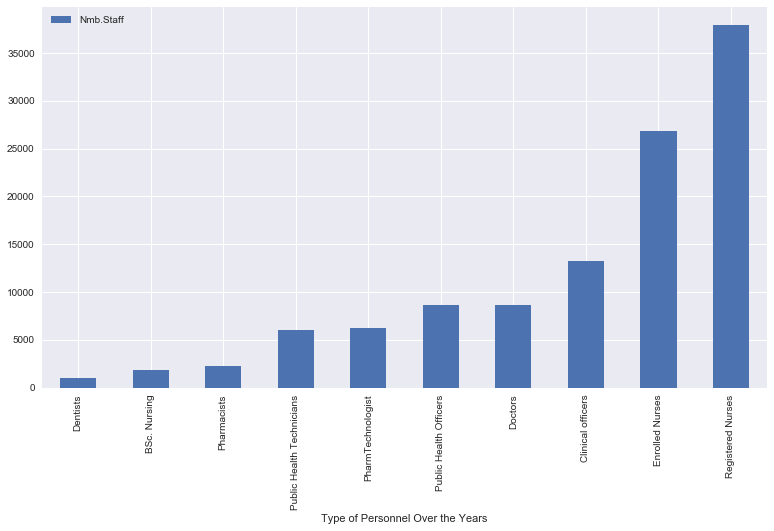

In [32]:
print( "\n\n Numbers as at 2013")
pd.pivot_table( db[ db["Year"]=="2013"], index=["Type of Personnel Over the Years"], values=["Nmb.Staff"], 
              aggfunc=sum).sort_values(by="Nmb.Staff").plot(kind="bar", figsize=(13,7))

In [40]:
print("\n\n 2013 Ratios")
# ratio of nurses to doctors
#print("\n\n Ratio: Nurses to doctors %d " % (     )
db[ (db["Year"]=="2013") & (db["Type of Personnel Over the Years"]=="Registered Nurses")] / db[ (db["Year"]=="2013") & (db["Type of Personnel Over the Years"]=="Doctors") ] 


# ratio of clinical and public health officers to nurses 
(db[ (db["Year"]=="2013") & (db["Type of Personnel Over the Years"]=="Clinical Officers")] + db[ (db["Year"]=="2013") & (db["Type of Personnel Over the Years"]=="Public Health Officers")] )/ db[ (db["Year"]=="2013") & (db["Type of Personnel Over the Years"]=="Doctors")]
 



 2013 Ratios


,Type of Personnel Over the Years,Year,Nmb.Staff
131,NaN,NaN,NaN
135,NaN,NaN,NaN


,Type of Personnel Over the Years,Year,Nmb.Staff
135,NaN,NaN,NaN
138,NaN,NaN,NaN
